<a href="https://colab.research.google.com/github/bharti-45/Facial-Recognition-System_/blob/main/facial_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import pandas as pd
import os
import numpy as np

### **1. Load the Data**

In [ ]:
df = pd.read_csv('list_attr_celeba.csv')
df.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [ ]:
subset_filenames = df['image_id'].head(1965).tolist()
print(subset_filenames)

['000001.jpg', '000002.jpg', '000003.jpg', '000004.jpg', '000005.jpg', '000006.jpg', '000007.jpg', '000008.jpg', '000009.jpg', '000010.jpg', '000011.jpg', '000012.jpg', '000013.jpg', '000014.jpg', '000015.jpg', '000016.jpg', '000017.jpg', '000018.jpg', '000019.jpg', '000020.jpg', '000021.jpg', '000022.jpg', '000023.jpg', '000024.jpg', '000025.jpg', '000026.jpg', '000027.jpg', '000028.jpg', '000029.jpg', '000030.jpg', '000031.jpg', '000032.jpg', '000033.jpg', '000034.jpg', '000035.jpg', '000036.jpg', '000037.jpg', '000038.jpg', '000039.jpg', '000040.jpg', '000041.jpg', '000042.jpg', '000043.jpg', '000044.jpg', '000045.jpg', '000046.jpg', '000047.jpg', '000048.jpg', '000049.jpg', '000050.jpg', '000051.jpg', '000052.jpg', '000053.jpg', '000054.jpg', '000055.jpg', '000056.jpg', '000057.jpg', '000058.jpg', '000059.jpg', '000060.jpg', '000061.jpg', '000062.jpg', '000063.jpg', '000064.jpg', '000065.jpg', '000066.jpg', '000067.jpg', '000068.jpg', '000069.jpg', '000070.jpg', '000071.jpg', '0000

In [ ]:
df.tail()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
202594,202595.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
202595,202596.jpg,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
202596,202597.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
202597,202598.jpg,-1,1,1,-1,-1,-1,1,-1,1,...,-1,1,-1,1,1,-1,1,-1,-1,1
202598,202599.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,1,-1,-1,1


In [ ]:
df.describe

<bound method NDFrame.describe of           image_id  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  \
0       000001.jpg                -1                1           1   
1       000002.jpg                -1               -1          -1   
2       000003.jpg                -1               -1          -1   
3       000004.jpg                -1               -1           1   
4       000005.jpg                -1                1           1   
...            ...               ...              ...         ...   
202594  202595.jpg                -1               -1           1   
202595  202596.jpg                -1               -1          -1   
202596  202597.jpg                -1               -1          -1   
202597  202598.jpg                -1                1           1   
202598  202599.jpg                -1                1           1   

        Bags_Under_Eyes  Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  \
0                    -1    -1     -1        -1        -1          -1  ...   
1                     1    -1     -1        -1         1          -1  ...   
2                    -1    -1     -1         1        -1          -1  ...   
3                    -1    -1     -1        -1        -1          -1  ...   
4                    -1    -1     -1         1        -1          -1  ...   
...                 ...   ...    ...       ...       ...         ...  ...   
202594               -1    -1     -1         1        -1          -1  ...   
202595               -1    -1      1         1        -1          -1  ...   
202596               -1    -1     -1        -1        -1           1  ...   
202597               -1    -1     -1         1        -1           1  ...   
202598               -1    -1     -1        -1        -1          -1  ...   

        Sideburns  Smiling  Straight_Hair  Wavy_Hair  Wearing_Earrings  \
0              -1        1              1         -1                 1   
1              -1        1             -1         -1                -1   
2              -1       -1             -1          1                -1   
3              -1       -1              1         -1                 1   
4              -1       -1             -1         -1                -1   
...           ...      ...            ...        ...               ...   
202594         -1       -1             -1         -1                -1   
202595         -1        1              1         -1                -1   
202596         -1        1             -1         -1                -1   
202597         -1        1             -1          1                 1   
202598         -1       -1             -1          1                -1   

        Wearing_Hat  Wearing_Lipstick  Wearing_Necklace  Wearing_Necktie  \
0                -1                 1                -1               -1   
1                -1                -1                -1               -1   
2                -1                -1                -1               -1   
3                -1                 1                 1               -1   
4                -1                 1                -1               -1   
...             ...               ...               ...              ...   
202594           -1                 1                -1               -1   
202595           -1                -1                -1               -1   
202596           -1                -1                -1               -1   
202597           -1                 1                -1               -1   
202598           -1                 1                -1               -1   

        Young  
0           1  
1           1  
2           1  
3           1  
4           1  
...       ...  
202594      1  
202595      1  
202596      1  
202597      1  
202598      1  

[202599 rows x 41 columns]>

### **2. Preprocessing of the image**

In [ ]:
pip install opencv-python mtcnn numpy

  Using cached lz4-4.4.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.8 kB)
Using cached lz4-4.4.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)
  Attempting uninstall: lz4
    Found existing installation: lz4 4.3.2
    Uninstalling lz4-4.3.2:
      Successfully uninstalled lz4-4.3.2


In [ ]:
!pip uninstall -y lz4
!pip install lz4==4.3.2

Found existing installation: lz4 4.4.4
Uninstalling lz4-4.4.4:
  Successfully uninstalled lz4-4.4.4
  Using cached lz4-4.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.7 kB)
Using cached lz4-4.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mtcnn 1.0.0 requires lz4>=4.3.3, but you have lz4 4.3.2 which is incompatible.


In [ ]:
from mtcnn import MTCNN
detector = MTCNN()

In [ ]:
!unzip -q Dataset.zip -d/content/

replace /content/__MACOSX/._Dataset? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:

input_folder = '/content/Dataset'
print(f"Number of files extracted: {len(os.listdir(input_folder))}")
print("some sample files:",os.listdir(input_folder)[:5])
output_folder = '/content/processed_faces'
os.makedirs(output_folder, exist_ok=True)

Number of files extracted: 1965
some sample files: ['img000711.jpg', 'img000468.jpg', 'img000881.jpg', 'img000621.jpg', 'img000893.jpg']


In [ ]:
def preprocess_image(image_path, image_size=(160,160)):
  # Read and Convert to RGB
  image = cv2.imread(image_path)
  if image is None:
    return None
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  # Detect Face and landmarks
  results = detector.detect_faces(image_rgb)

  if not results:
    return None # No face detected

  # Extract bounding box
  x,y,w,h = results[0]['box']
  x,y = max(0,x),max(0,y) #Ensure non_negative
  face = image_rgb[y:y+h, x:x+w]

  # resize to desired input shape
  face = cv2.resize(face,(160,160))
  face = face/255.0
  return face

processed_count = 0
for i, filename in enumerate(os.listdir(input_folder)):
  if not str(filename).lower().endswith(('.jpg','.png')):
    continue
  img_path = os.path.join(input_folder, str(filename))
  face = preprocess_image(img_path)

  if face is not None:
    save_path = os.path.join(output_folder, filename)
    face_uint8 = (face*255).astype('uint8')

# Process a small sample
    cv2.imwrite(save_path, cv2.cvtColor(face_uint8, cv2.COLOR_RGB2BGR))
    processed_count += 1
print(f"Processed {processed_count} faces successfully.")

Processed 1854 faces successfully.


In [ ]:
pip install h5py

In [ ]:
pip install keras_facenet

  Preparing metadata (setup.py) ... done
  Using cached lz4-4.4.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.8 kB)
Using cached lz4-4.4.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)
  Created wheel for keras_facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10367 sha256=7672953e5892624815581dbc88ab9bbd70f287dcd55b2b2e9c2837539f26dd3a
  Stored in directory: /root/.cache/pip/wheels/99/94/dd/cb1a65a7440ba6d508bd24346c15af0b1d24ff8b1cdb1c9959
Successfully built keras_facenet
  Attempting uninstall: lz4
    Found existing installation: lz4 4.3.2
    Uninstalling lz4-4.3.2:
      Successfully uninstalled lz4-4.3.2


**3. Feature Extracting and Deep Learning Model**

In [ ]:
from tensorflow.keras.models import load_model
from keras_facenet import FaceNet
model = FaceNet()

def prewhiten(x):
  mean, std = np.mean(x), np.std(x)
  std_adj = np.maximum(std,1.0/np.sqrt(x.size))
  y = (x-mean)/std_adj
  return y

# Function to det embedding for a face image
def get_embedding(image_bgr):
  try:

    image_resized = cv2.resize(image_bgr,(160,160))
    image_rgb = cv2.cvtColor(image_resized,cv2.COLOR_BGR2RGB)
    image_rgb = image_rgb.astype('float32')/255.0
    image_rgb = prewhiten(image_rgb)
    samples = np.expand_dims(image_rgb,axis=0)
    yhat = model.embeddings(samples)
    embedding = yhat[0]
    if hasattr(embedding,'numpy'):
      embedding = embedding.numpy()
    return embedding
  except Exception as e:
    print("Embedding failed:",e)
    return None

In [ ]:
embeddings = []
image_names = []

image_folder = '/content/processed_faces'

for filename in os.listdir(image_folder):
  if not filename.lower().endswith(('.jpg','.png')):
    continue
  img_path = os.path.join(image_folder, filename)
  image = cv2.imread(img_path)
  if image is None:
    continue

  embedding = get_embedding(image)
  embeddings.append(embedding)

  image_names.append(filename)
print('Embedding Shape: ',np.shape(embeddings))

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [ ]:
X = np.array(embeddings)
y = np.array(image_names)
import pickle
with open('embeddings.pkl', 'wb') as f:
  pickle.dump((X,y),f)

**4. Train the Classifier**

In [ ]:
with open('embeddings.pkl', 'rb') as f:
  X,y = pickle.load(f)

labels = [filename.split('.')[0] for filename in y] # extract the name of the person

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)

classifier = SVC(kernel='linear', probability=True)

classifier.fit(X,y_encoded)

SVC(kernel='linear', probability=True)

In [ ]:
test_img_path = '/content/processed_faces/img000011.jpg'
test_img = cv2.imread(test_img_path)
test_embedding = get_embedding(test_img)

# Predict
pred_label = classifier.predict([test_embedding])[0]
pred_name = label_encoder.inverse_transform([pred_label])[0]
print("🔍 Predicted Person:", pred_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
🔍 Predicted Person: img001000-with-mask


**5. Face detection**

In [ ]:
import matplotlib.pyplot as plt

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
def detect_faces(image_path):
  img = cv2.imread(image_path)
  if img is None:
    return None
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5)
  for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

  #show image
  plt.figure(figsize=(8,6))
  plt.imshow(img_rgb)
  plt.title(f"Detected {len(faces)} face(s)")
  plt.axis('off')
  plt.show()

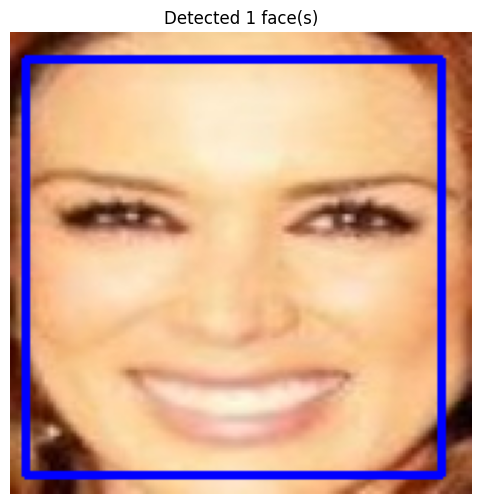

In [ ]:
image_path = '/content/processed_faces/img000045.jpg'
faces = detect_faces(image_path)

**6. Face Recognition**

In [ ]:

def recognize_faces(face_image,classifier):
  embedding = get_embedding(face_image)
  embedding = embedding.reshape(1,-1)
  pred_label = classifier.predict(embedding)[0]
  return pred_label

In [ ]:
test_image = cv2.imread('/content/processed_faces/img000011.jpg')
pred_identity = recognize_faces(test_image,classifier)
print(f"Recognized as: {pred_identity}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Recognized as: 1853


In [ ]:
#using cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
known_embeddings = embeddings #list of 512-d vectors from facenet
known_labels = image_names # corrwsponding filenames or IDs
def recognize_face(query,known_embeddings,known_labels,threshold=0.5):
  if len(known_embeddings) == 0:
    return "No known enbeddings provided."
  similarities = cosine_similarity([query],known_embeddings)[0]
  best_match_index = np.argmax(similarities)
  best_score = similarities[best_match_index]

  if best_score>threshold:
    return f"Match Found: {known_labels[best_match_index]} (Score:{best_score:.2f})"
  else:
    return "No Match Found"

In [ ]:
test_img_path = '/content/processed_faces/img000023.jpg'
test_img = cv2.imread(test_img_path)
test_embedding = get_embedding(test_img)
result = recognize_face(test_embedding,embeddings,image_names)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
Match Found: img000711.jpg (Score:1.00)


**7. Building a user interface**

In [ ]:
!pip install flask flask-ngrok
!mkdir -p templates static/uploads

In [ ]:
!pip install pyngrok

In [ ]:
#from flask_ngrok import run_with_ngrok
from flask import Flask, render_template_string, request
from werkzeug.utils import secure_filename
from sklearn.neighbors import KNeighborsClassifier
import pickle
from pyngrok import ngrok

embedder = FaceNet()

model = SVC(kernel='linear',probability=True)
model.fit(embeddings, labels)

with open("face_classifier.pkl","wb") as f:
  pickle.dump(model,f)
# load your trained classifier
with open("face_classifier.pkl",'rb') as f:
  classifier = pickle.load(f)

def get_embedding(image_bgr):
  face = cv2.resize(image_bgr,(160,160))
  face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
  face = face.astype('float32')/255.0
  face = (face-face.mean())/max(face.std(),1e-6)
  embedding = embedder.embeddings(np.expand_dims(face,axis=0))[0]
  return embedding

In [ ]:
os.makedirs("templates",exist_ok=True)

In [ ]:
import shutil

shutil.move("index.html",'templates/index.html')

'templates/index.html'

In [ ]:
from flask import render_template

def gen_frames():
  camera = cv2.VideoCapture(0)
  while True:
    success, frame = camera.read()
    if not success:
      break
    else:
      frame = blur_recognized_faces(frame,classifier,labels)
      ret, buffer = cv2.imencode('.jpg',frame)
      frame = buffer.tobytes()
      yield (b'--frame\r\n'
                   b'Content-Type: image/jpeg\r\n\r\n' + frame + b'\r\n')

In [ ]:
def blur_unrecognized_faces(frame,classifier,known_labels):
  rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
  faces = detector.detect_faces(rgb_frame)
  for face in faces:
    x,y,w,h = face['box']
    x,y = max(0,x),max(0,y)
    face_img = rgb_frame[y:y+h,x:x+w]
    face_img = cv2.resize(face_img,(160,160))
    embedding = get_embedding(cv2.cvtColor(face_img,cv2.COLOR_BGR2RGB))
    label=classifier.predict([embedding])[0]
    if pred_label not in known_labels:

      frame[y:y+h,x:x+w] = cv2.GaussianBlur(frame[y:y+h, x:x+w],(99,99),30)
  return frame


In [ ]:
from flask import Response
app = Flask(__name__)
#run_with_ngrok(app)

upload_folder = 'static/uploads'
face_folder = 'static/faces'

os.makedirs(upload_folder, exist_ok=True)
os.makedirs(face_folder, exist_ok=True)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

@app.route('/',methods=['GET','POST'])
def index():
  label = None
  filename = None
  confidence = None
  cropped_filename = None

  index_html = 'templates/index.html'

  if request.method == 'POST':
    file = request.files['image']
    filename = secure_filename(file.filename)
    path = os.path.join(upload_folder,filename)
    file.save(path)

    image = cv2.imread(path)
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5)

    if len(faces)>0:
      x,y,w,h = faces[0]
      face_img = image[y:y+h, x:x+w]
      cropped_filename = "face_" + filename
      cv2.imwrite(os.path.join(face_folder,cropped_filename),face_img)

      embedding = get_embedding(face_img)
      prediction = classifier.predict([embedding])[0]
      confidence_score = classifier.predict_proba([embedding]).max()

      label = prediction
      confidence = round(confidence_score*100,2)
    else:
      label = "No Face Detected"
      confidence=0

  return render_template_string('''
  <!DOCTYPE html>
    <html>
    <head>
        <title>Face Recognition</title>
    </head>
    <body>
        <h2>Upload an Image</h2>
        <form method="POST" enctype="multipart/form-data">
            <input type="file" name="image"><br><br>
            <input type="submit" value="Recognize">
        </form>
        {% if label %}
            <h3>Prediction: {{ label }}</h3>
            <h4>Confidence: {{ confidence }}%</h4>
            {% if cropped_filename %}
                <p>Cropped Face:</p>
                <img src="/static/faces/{{ cropped_filename }}" width="160">
                <h2>Live Camera Feed: </h2>
                <img src="{{ url_for('video_feed') }}" width="640" height="480">
                <p>This application uses facial recognition for demo purposes only. Images are not stored permanently. By uploading, you agree to this usage.</p>
            {% endif %}
        {% endif %}
    </body>
    </html>
    ''', label=label, confidence=confidence,filename=filename, cropped_filename=cropped_filename)

@app.route('/video_feed')
def video_feed():
  return Response(gen_frames(), mimetype='multipart/x-mixed-replace; boundary=frame')
port = 5000
ngrok.set_auth_token("2y58gn7WgmImyUbcMRSoa5kSn8v_3TTqRXnu8VqisFPN959GV")
public_url = ngrok.connect(port)
print("* Ngrok Tunnel URL: ", public_url)
app.run(port=port)


* Ngrok Tunnel URL:  NgrokTunnel: "https://6f0a-34-32-219-120.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


**8. Testing and Evaluation**

Total images: 1854
Unique person IDs: 995
Example person IDs: ['000727', '000328', '000881', '000497', '000601', '000924', '000159', '000172', '000037', '000529']
🔍 Cosine similarity between img000002.jpg and img000002-with-mask.jpg: 1.0000
✅ Accuracy: 0.05% on 1854 evaluated images (Skipped 0)
Unique embeddings: 1 / 1854
Embeddings shape: (1854, 512)
Image names count: 1854


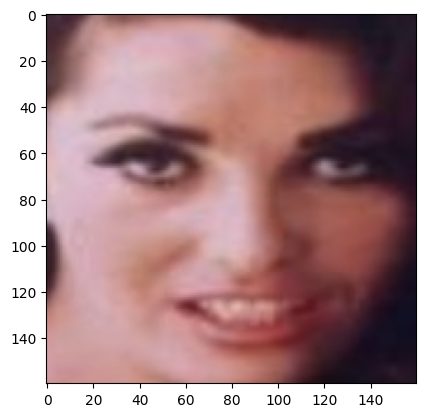

In [ ]:

person_ids = [get_person_id(name) for name in image_names]
unique_person_ids = set(person_ids)
print(f"Total images: {len(image_names)}")
print(f"Unique person IDs: {len(unique_person_ids)}")
print(f"Example person IDs: {list(unique_person_ids)[:10]}")
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pickle
import re

with open('embeddings.pkl', 'rb') as f:
    embeddings, image_names = pickle.load(f)

def leave_one_out_evaluation(embeddings, image_names, threshold=0.3):
  embeddings = np.array(embeddings)
  image_names = list(image_names)
  total = len(embeddings)
  correct = 0
  skipped = 0

  def extract_id(filename):
    match = re.search(r'img(\d+)', filename)
    return match.group(1) if match else None

  if total < 2:
      print("❌ Not enough embeddings to evaluate. Add more images.")
      return

  for i in range(total):
      query_embedding = embeddings[i]
      query_name = image_names[i]

        # Exclude current image
      known_embeddings = np.delete(embeddings,i,axis=0)
      known_names = image_names[:i] + image_names[i+1:]

        # Skip if known_embeddings is empty
      if known_embeddings.shape[0] == 0:
          skipped += 1
          continue

      try:
          similarities = cosine_similarity([query_embedding], known_embeddings)[0]
      except Exception as e:
          print(f"⚠️ Error on index {i}: {e}")
          skipped += 1
          continue

      best_match_index = np.argmax(similarities)
      best_score = similarities[best_match_index]
      predicted_name = known_names[best_match_index]
      true_id = extract_id(query_name)
      pred_id = extract_id(predicted_name)

      #print(f"Query: {query_name} | Prediction: {predicted_name} | Score: {best_score:.3f}")

      if  pred_id == true_id and best_score>=threshold:
          correct += 1

  evaluated = total - skipped
  if evaluated == 0:
      print("❌ All cases skipped. Check if embeddings are valid.")
  else:
      accuracy = correct / evaluated * 100

      print(f"✅ Accuracy: {accuracy:.2f}% on {evaluated} evaluated images (Skipped {skipped})")
image_names_list = list(image_names)
id1 = "img000002.jpg"
id2 = "img000002-with-mask.jpg"

# Check if both image names exist in the list
if id1 in image_names_list and id2 in image_names_list:
    i1 = image_names_list.index(id1)
    i2 = image_names_list.index(id2)

    # Compute cosine similarity between the embeddings
    sim = cosine_similarity([embeddings[i1]], [embeddings[i2]])[0][0]
    print(f"🔍 Cosine similarity between {id1} and {id2}: {sim:.4f}")
else:
    print("❌ One or both image names not found in image_names list.")
leave_one_out_evaluation(embeddings, image_names, threshold=0.3)
unique_embeddings = np.unique(np.array(embeddings), axis=0)
print(f"Unique embeddings: {len(unique_embeddings)} / {len(embeddings)}")
print(f"Embeddings shape: {embeddings.shape}")
print(f"Image names count: {len(image_names)}")
import matplotlib.pyplot as plt
plt.imshow(cv2.imread("/content/processed_faces/img000011.jpg")[..., ::-1])
#print(embeddings[0])

In [ ]:
import time

def evaluate_speed(embeddings, image_names):
    start = time.time()
    for i in range(len(embeddings)):
        _ = cosine_similarity([embeddings[i]], embeddings)[0]
    end = time.time()
    avg_time = (end - start) / len(embeddings)
    print(f"⚡ Average Recognition Time: {avg_time:.4f} seconds/image")

evaluate_speed(embeddings, image_names)

⚡ Average Recognition Time: 0.0057 seconds/image
